# Data Science: Bank Marketing

Bank client data:

    1. age (numeric)
    2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-empl
    oyed','services','student','technician','unemployed','unknown') 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5. default: has credit in default? (categorical: 'no','yes','unknown')
    6. housing: has housing loan? (categorical: 'no','yes','unknown')
    7. loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

    8  contact: contact communication type (categorical: 'cellular','telephone')
    9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

    12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14. previous: number of contacts performed before this campaign and for this client (numeric)
    15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

    16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17. cons.price.idx: consumer price index - monthly indicator (numeric)
    18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19. euribor3m: euribor 3 month rate - daily indicator (numeric)
    20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
    21. y - has the client subscribed a term deposit? (binary: 'yes','no')

**Objective:** Obtain a model that determines whether or not X customer will buy your product, based on past interactions with the bank and other financial institutions.

**Steps**
1. EDA
2. Outlier detection and elimination
3. Missing values imputation
4. Encoding categorical features
5. Data Scaling and Normalization
6. Data transformation

## Quick EDA

In [1]:
# Importings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset loading
bank_df = pd.read_csv("../bank-additional-full.csv")
print(bank_df.head())
print(bank_df.shape)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [3]:
bank_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset has 21 columns (features) and 41188 rows (instances)

In [5]:
bank_df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The dataset is imbalanced, we will need to keep that in mind when building our models!

### Outlier detection

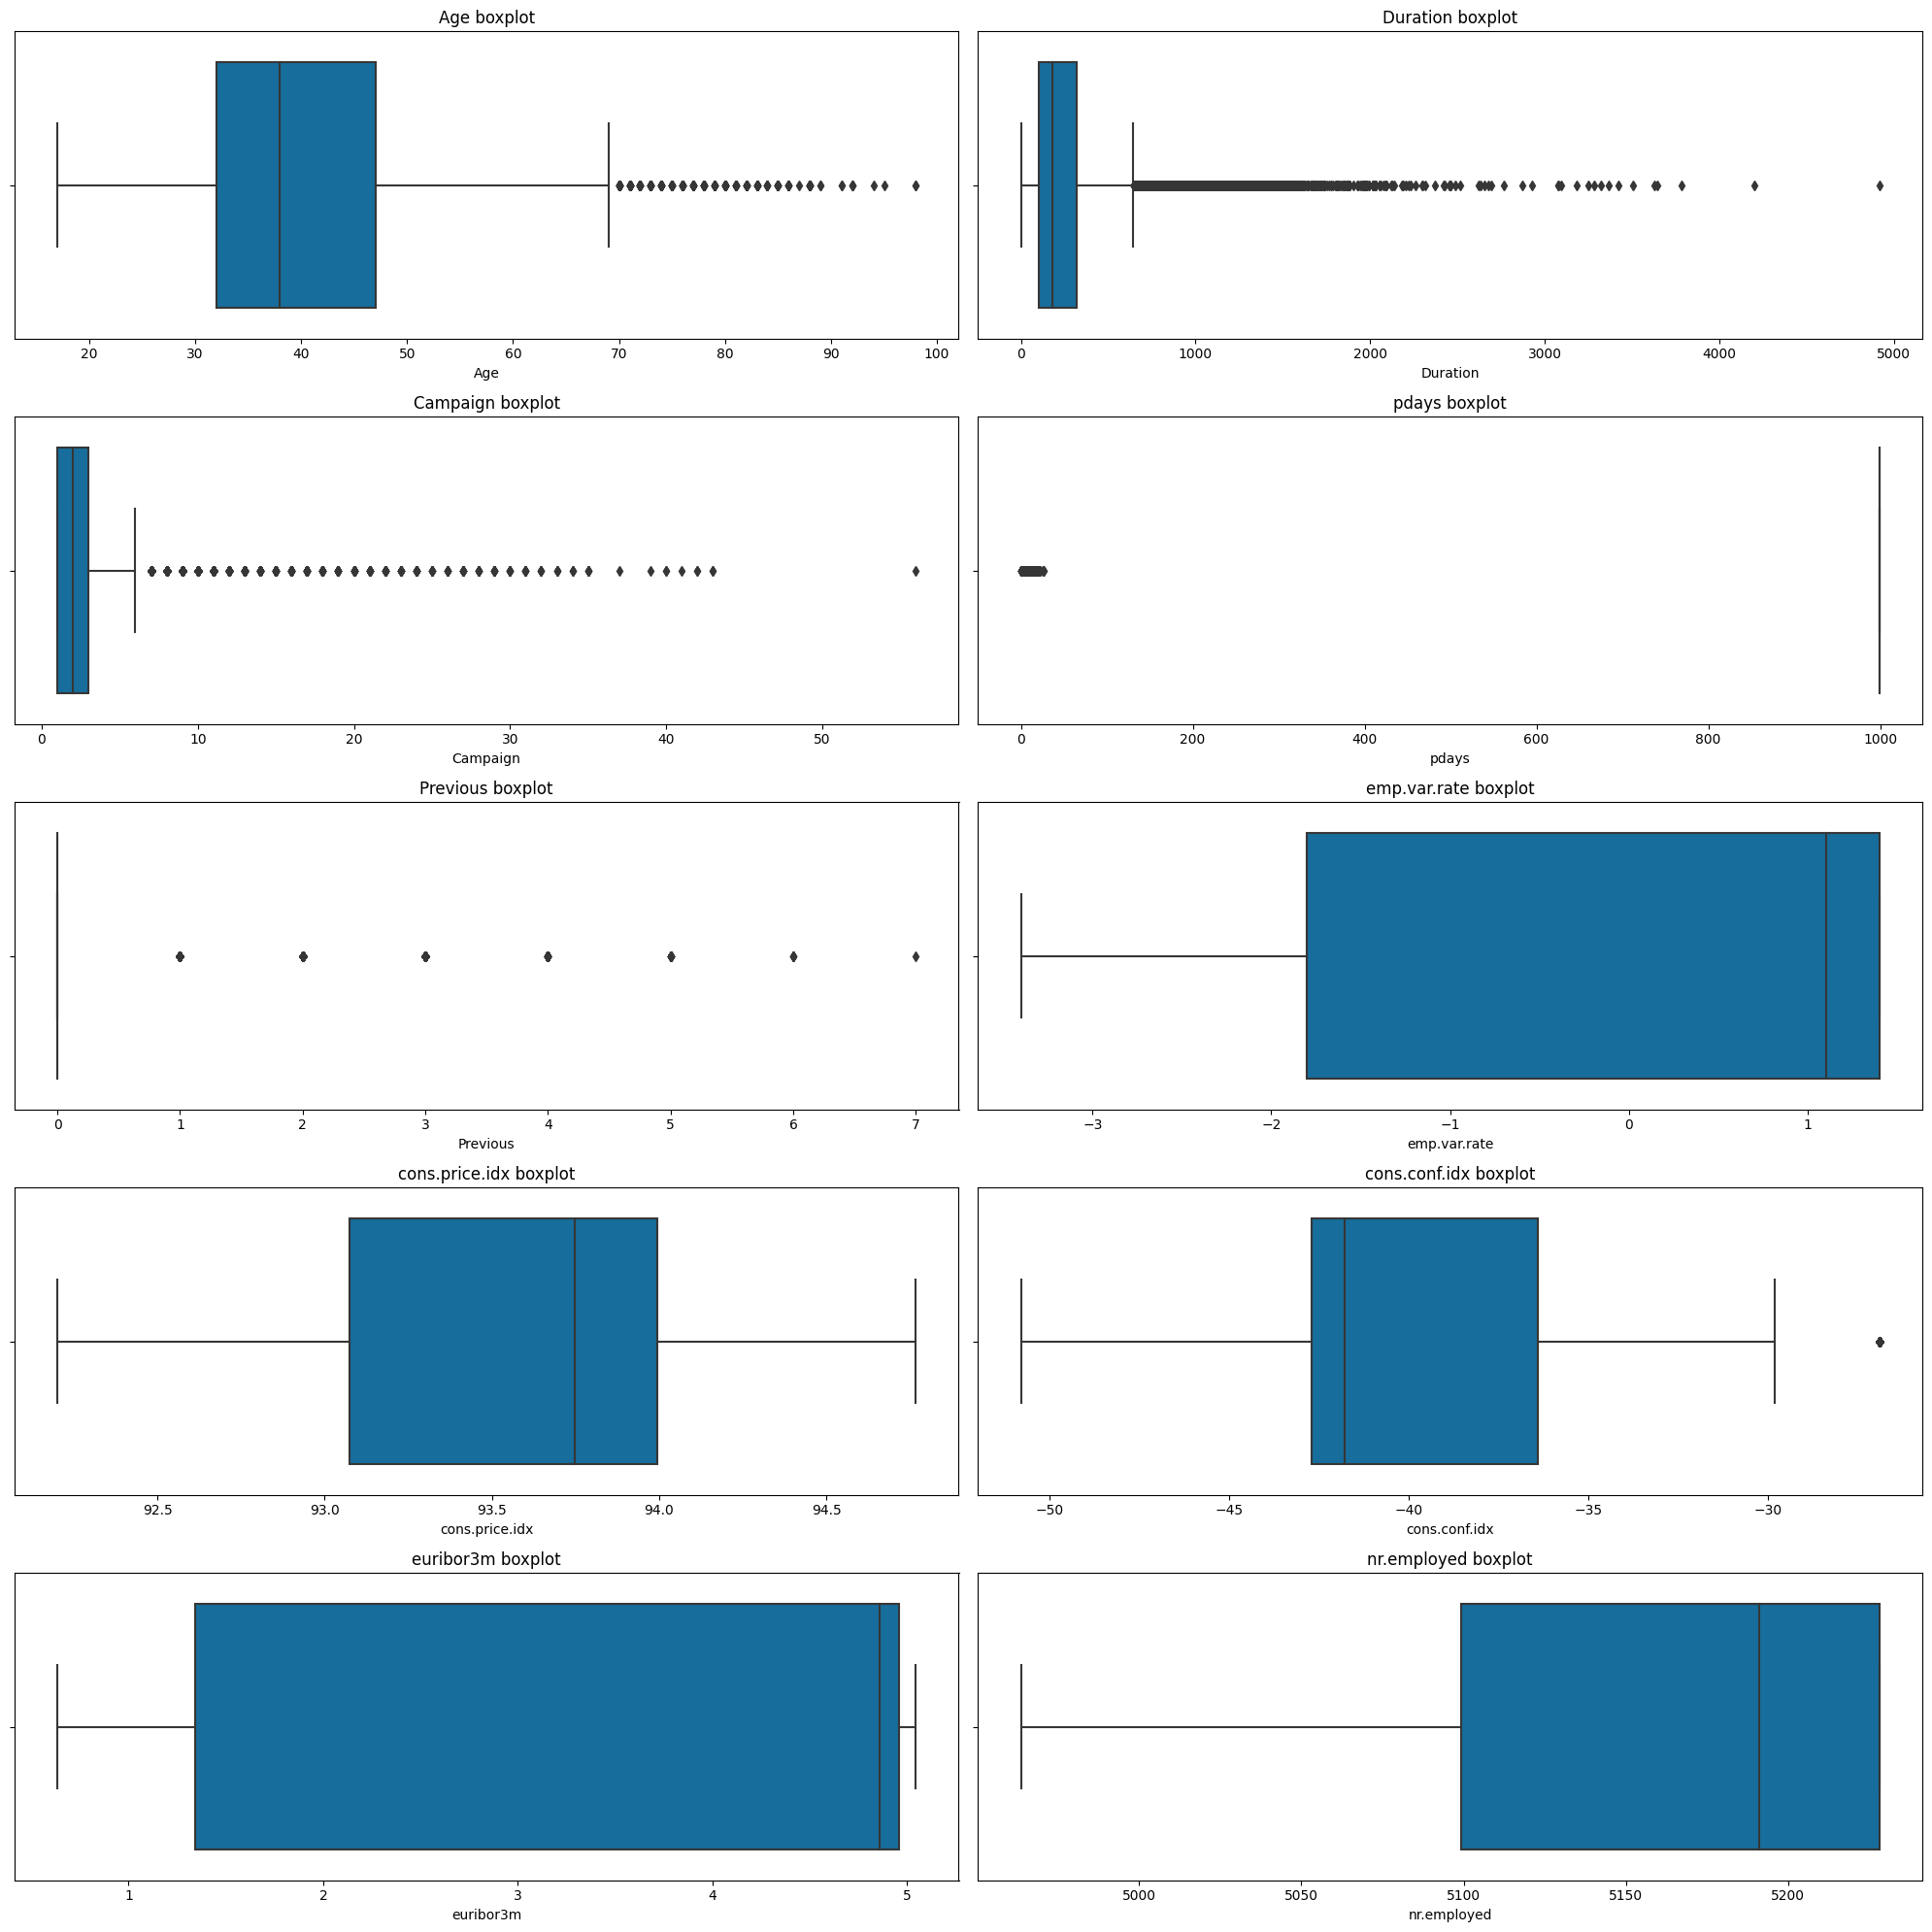

In [6]:
plt.figure(figsize = (20,20))
plt.subplot(5, 2, 1)
sns.boxplot(data = bank_df, x= 'age', palette = 'colorblind')
plt.title('Age boxplot')
plt.xlabel('Age')

plt.subplot(5, 2, 2)
sns.boxplot(data = bank_df, x= 'duration', palette = 'colorblind')
plt.title('Duration boxplot')
plt.xlabel('Duration')

plt.subplot(5, 2, 3)
sns.boxplot(data = bank_df, x= 'campaign', palette = 'colorblind')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')

plt.subplot(5, 2, 4)
sns.boxplot(data = bank_df, x= 'pdays', palette = 'colorblind')
plt.title('pdays boxplot')
plt.xlabel('pdays')

plt.subplot(5, 2, 5)
sns.boxplot(data = bank_df, x= 'previous', palette = 'colorblind')
plt.title('Previous boxplot')
plt.xlabel('Previous')

plt.subplot(5, 2, 6)
sns.boxplot(data = bank_df, x= 'emp.var.rate', palette = 'colorblind')
plt.title('emp.var.rate boxplot')
plt.xlabel('emp.var.rate')

plt.subplot(5, 2, 7)
sns.boxplot(data = bank_df, x= 'cons.price.idx', palette = 'colorblind')
plt.title('cons.price.idx boxplot')
plt.xlabel('cons.price.idx')

plt.subplot(5, 2, 8)
sns.boxplot(data = bank_df, x= 'cons.conf.idx', palette = 'colorblind')
plt.title('cons.conf.idx boxplot')
plt.xlabel('cons.conf.idx')

plt.subplot(5, 2, 9)
sns.boxplot(data = bank_df, x= 'euribor3m', palette = 'colorblind')
plt.title('euribor3m boxplot')
plt.xlabel('euribor3m')

plt.subplot(5, 2, 10)
sns.boxplot(data = bank_df, x= 'nr.employed', palette = 'colorblind')
plt.title('nr.employed boxplot')
plt.xlabel('nr.employed')

plt.tight_layout()
plt.show()

In [7]:
# Outlier filter

def remove_outliers(dfx):
    q1 = dfx.quantile(0.25)
    q3 = dfx.quantile(0.75)
    iqr = q3 - q1
    cut_off = iqr*1.5
    
    df_filtred = dfx[~((dfx < (dfx.quantile(0.25) - cut_off)) | (dfx > (dfx.quantile(0.75) + cut_off))).any(axis=1)]
    
    
    return df_filtred

In [8]:
bank_df2 = remove_outliers(bank_df)

In [9]:
bank_df2.reset_index(drop=True, inplace=True)

In [10]:
bank_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30360 non-null  int64  
 1   job             30360 non-null  object 
 2   marital         30360 non-null  object 
 3   education       30360 non-null  object 
 4   default         30360 non-null  object 
 5   housing         30360 non-null  object 
 6   loan            30360 non-null  object 
 7   contact         30360 non-null  object 
 8   month           30360 non-null  object 
 9   day_of_week     30360 non-null  object 
 10  duration        30360 non-null  int64  
 11  campaign        30360 non-null  int64  
 12  pdays           30360 non-null  int64  
 13  previous        30360 non-null  int64  
 14  poutcome        30360 non-null  object 
 15  emp.var.rate    30360 non-null  float64
 16  cons.price.idx  30360 non-null  float64
 17  cons.conf.idx   30360 non-null 

In [11]:
bank_df2.shape

(30360, 21)

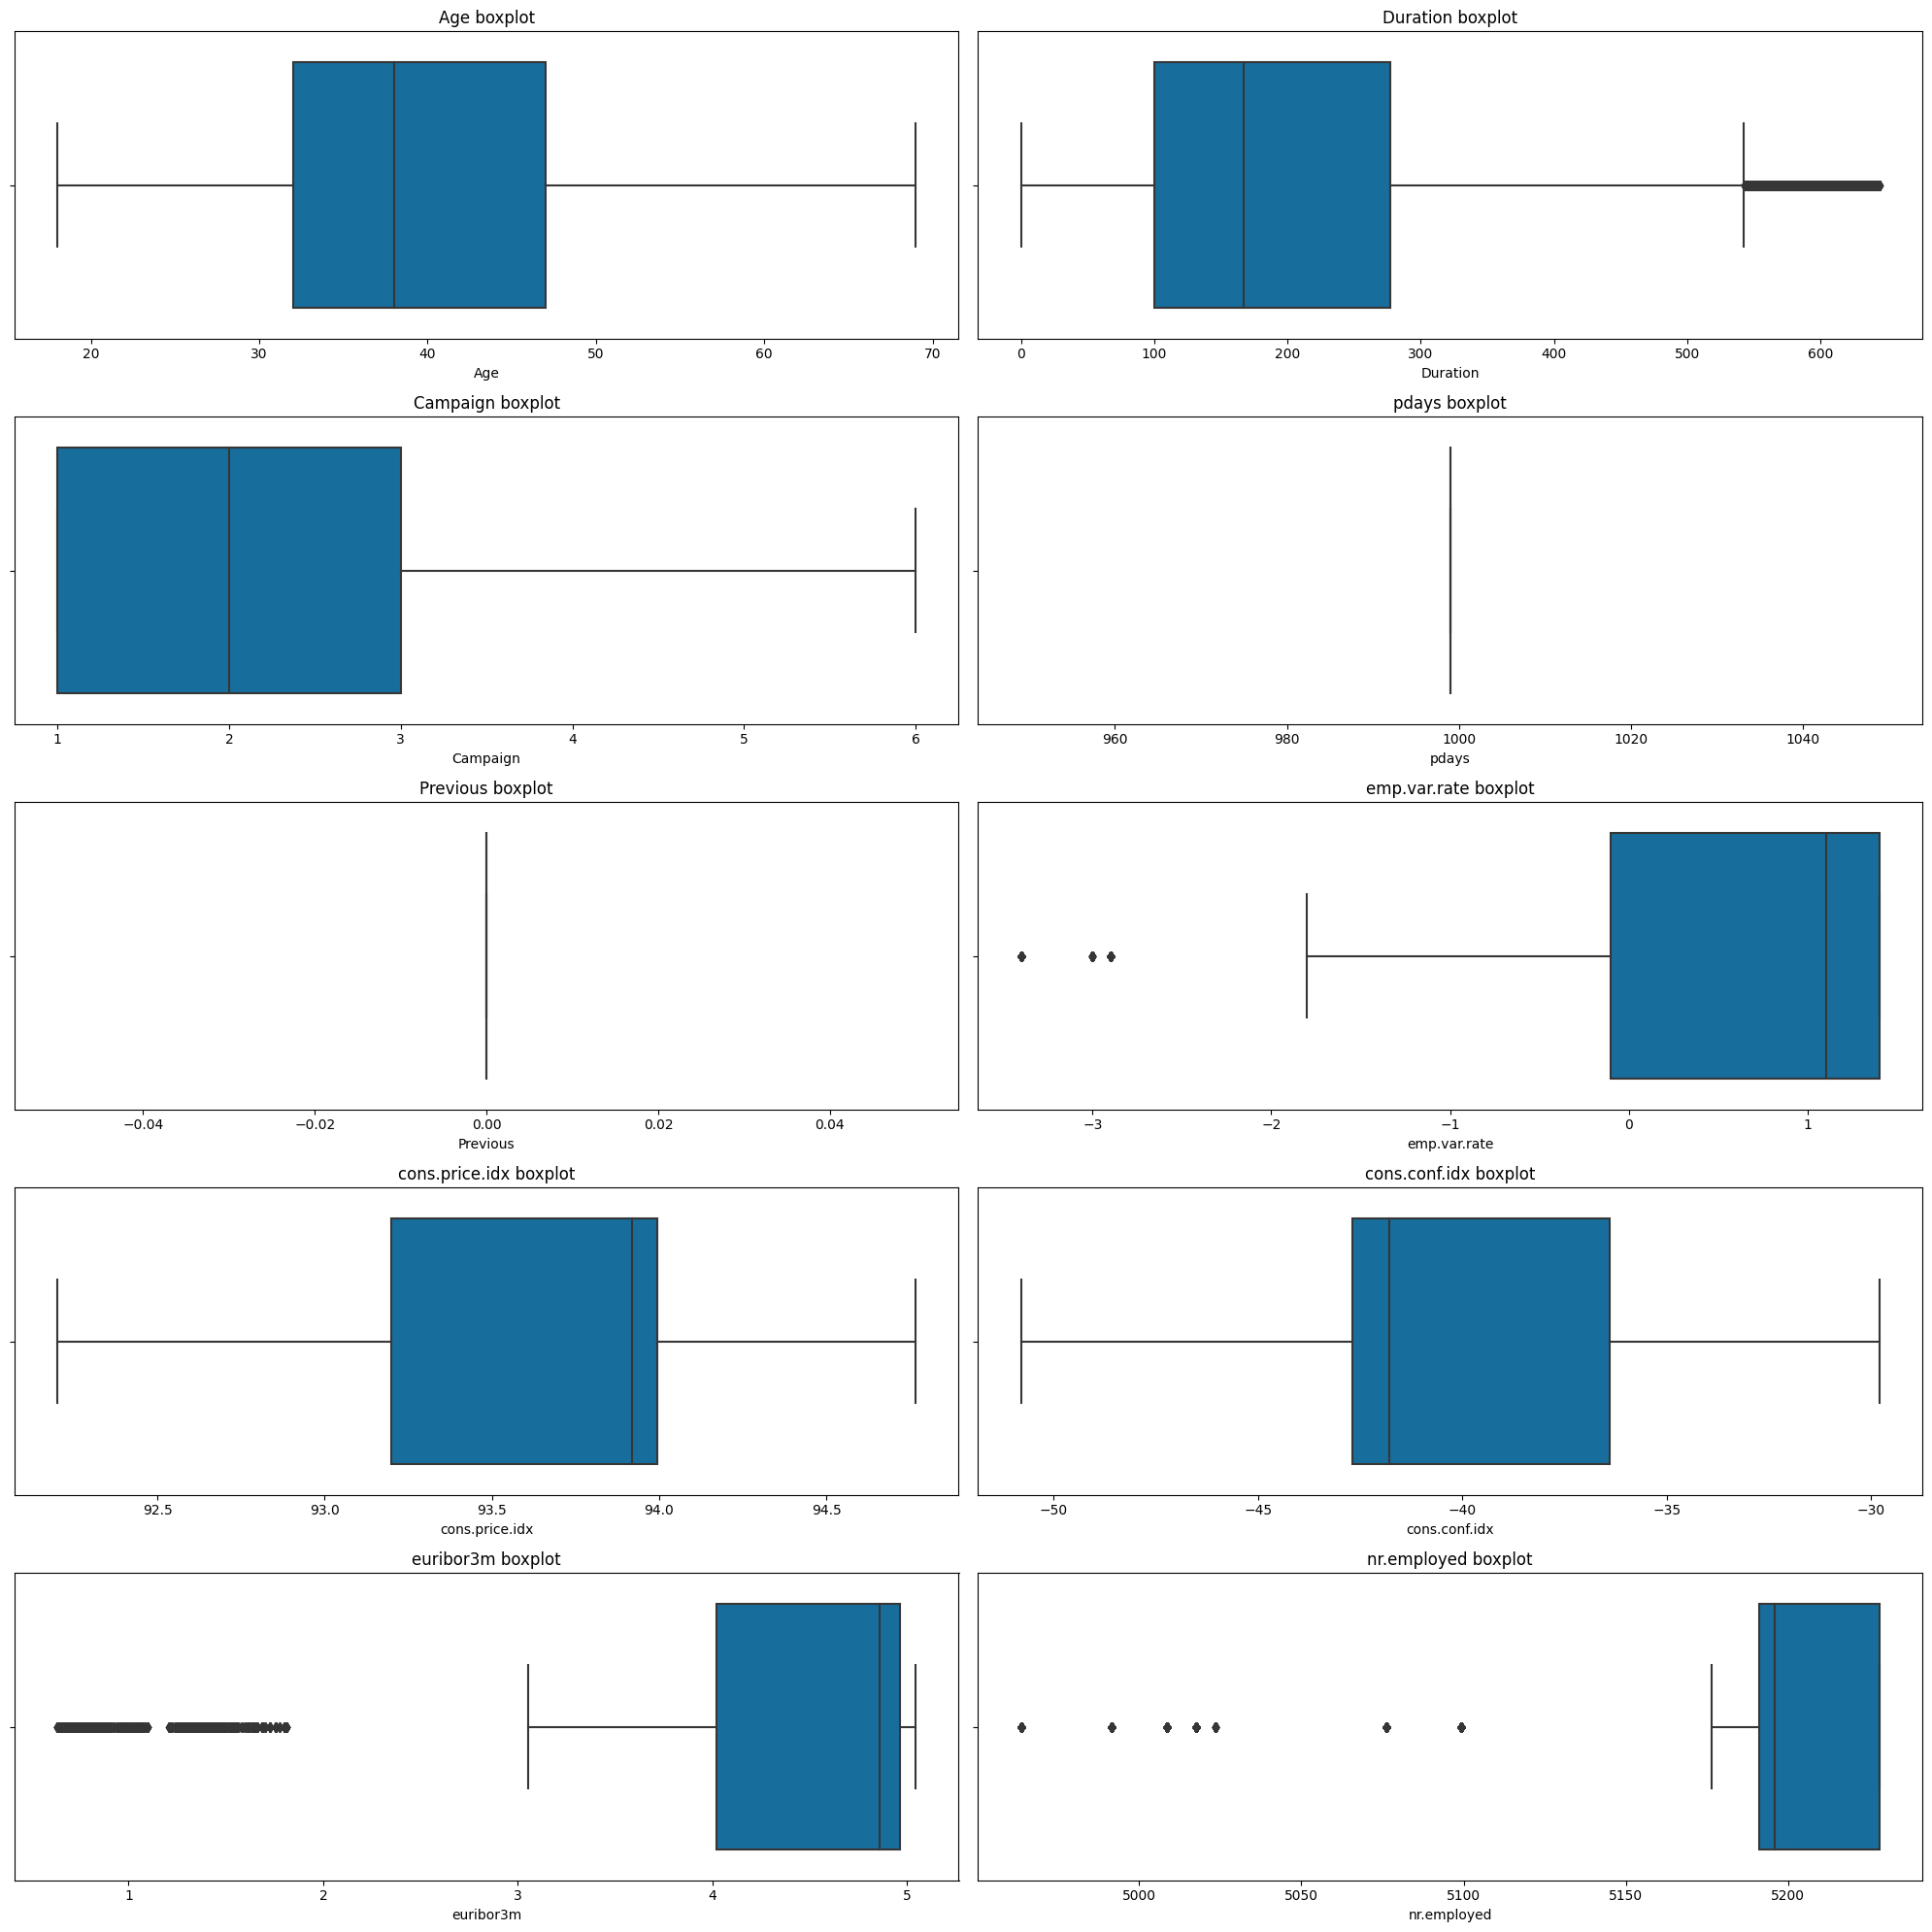

In [12]:
plt.figure(figsize = (20,20))
plt.subplot(5, 2, 1)
sns.boxplot(data = bank_df2, x= 'age', palette = 'colorblind')
plt.title('Age boxplot')
plt.xlabel('Age')

plt.subplot(5, 2, 2)
sns.boxplot(data = bank_df2, x= 'duration', palette = 'colorblind')
plt.title('Duration boxplot')
plt.xlabel('Duration')

plt.subplot(5, 2, 3)
sns.boxplot(data = bank_df2, x= 'campaign', palette = 'colorblind')
plt.title('Campaign boxplot')
plt.xlabel('Campaign')

plt.subplot(5, 2, 4)
sns.boxplot(data = bank_df2, x= 'pdays', palette = 'colorblind')
plt.title('pdays boxplot')
plt.xlabel('pdays')

plt.subplot(5, 2, 5)
sns.boxplot(data = bank_df2, x= 'previous', palette = 'colorblind')
plt.title('Previous boxplot')
plt.xlabel('Previous')

plt.subplot(5, 2, 6)
sns.boxplot(data = bank_df2, x= 'emp.var.rate', palette = 'colorblind')
plt.title('emp.var.rate boxplot')
plt.xlabel('emp.var.rate')

plt.subplot(5, 2, 7)
sns.boxplot(data = bank_df2, x= 'cons.price.idx', palette = 'colorblind')
plt.title('cons.price.idx boxplot')
plt.xlabel('cons.price.idx')

plt.subplot(5, 2, 8)
sns.boxplot(data = bank_df2, x= 'cons.conf.idx', palette = 'colorblind')
plt.title('cons.conf.idx boxplot')
plt.xlabel('cons.conf.idx')

plt.subplot(5, 2, 9)
sns.boxplot(data = bank_df2, x= 'euribor3m', palette = 'colorblind')
plt.title('euribor3m boxplot')
plt.xlabel('euribor3m')

plt.subplot(5, 2, 10)
sns.boxplot(data = bank_df2, x= 'nr.employed', palette = 'colorblind')
plt.title('nr.employed boxplot')
plt.xlabel('nr.employed')

plt.tight_layout()
plt.show()

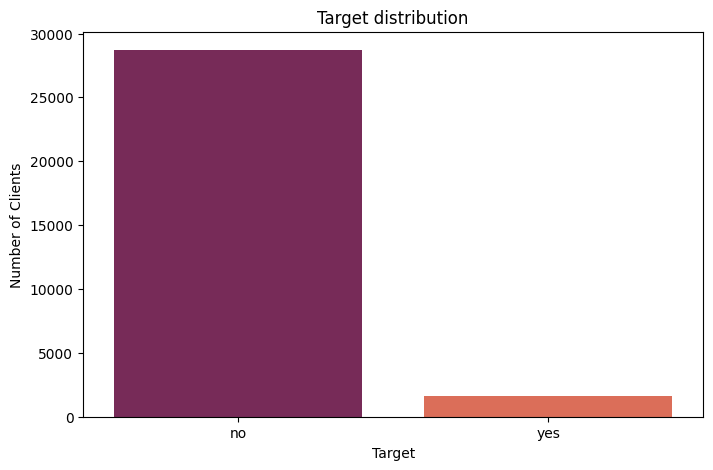

The amount of "no" target is =  36,548
The amount of "yes" target is = 4,640
The percentage of "no" target is = 88.73 %
The percentage of "yes" target is = 11.27 %


In [13]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x= 'y', data= bank_df2, palette='rocket')
plt.xlabel("Target") 
plt.ylabel('Number of Clients')
plt.title("Target distribution")  
plt.show()
#Finding the percentages of our target
per_target= (bank_df['y'] == 'yes').value_counts().to_frame('q')
n_target_q = per_target.q.iloc[0]
y_target_q = per_target.q.iloc[1]
total=per_target.q.sum() 
print('The amount of "no" target is =  {:,}'.format(n_target_q))
print('The amount of "yes" target is = {:,}'.format(y_target_q))
print(f'The percentage of "no" target is = {round((n_target_q/total)*100,2)}','%')
print(f'The percentage of "yes" target is = {round((y_target_q/total)*100,2)}','%')

## **Categorical Features Analysis**

In [14]:
#Categorical features

categorical = bank_df2.select_dtypes(include="object")
categorical.drop("y", axis=1, inplace=True)
categorical_list = categorical.columns.to_list()

In [15]:
for cat in categorical_list:
    print(f"Column: {cat} unique values")
    print(bank_df2[cat].unique())

Column: job unique values
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Column: marital unique values
['married' 'single' 'divorced' 'unknown']
Column: education unique values
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Column: default unique values
['no' 'unknown' 'yes']
Column: housing unique values
['no' 'yes' 'unknown']
Column: loan unique values
['no' 'yes' 'unknown']
Column: contact unique values
['telephone' 'cellular']
Column: month unique values
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Column: day_of_week unique values
['mon' 'tue' 'wed' 'thu' 'fri']
Column: poutcome unique values
['nonexistent']


**Job**

Let's look at what kind of jobs clients this bank have

In [16]:
bank_df2.job.value_counts()

admin.           7669
blue-collar      7146
technician       5086
services         2966
management       2141
entrepreneur     1096
self-employed    1060
retired           911
housemaid         804
unemployed        727
student           507
unknown           247
Name: job, dtype: int64

##############################################
Unkown job clients =  247
##############################################
Percentage of unknown client's job = 0.81 %


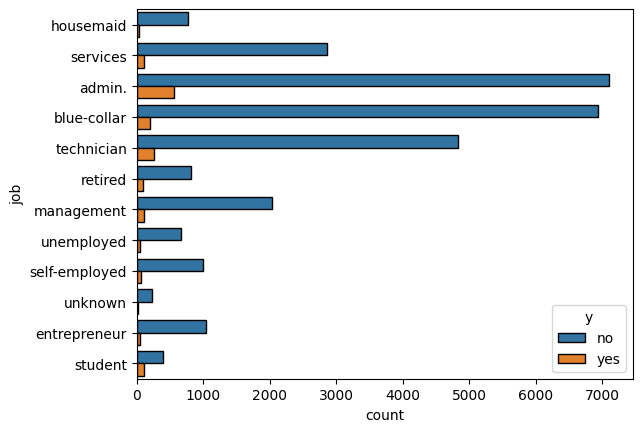

In [17]:
sns.countplot(data=bank_df2, y='job',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['job'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's job =" ,round(bank_df2[(bank_df2['job'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Marital**

In [18]:
bank_df2.marital.value_counts()

married     18647
single       8305
divorced     3362
unknown        46
Name: marital, dtype: int64

##############################################
Unkown job clients =  46
##############################################
Percentage of unknown client's marital = 0.15 %


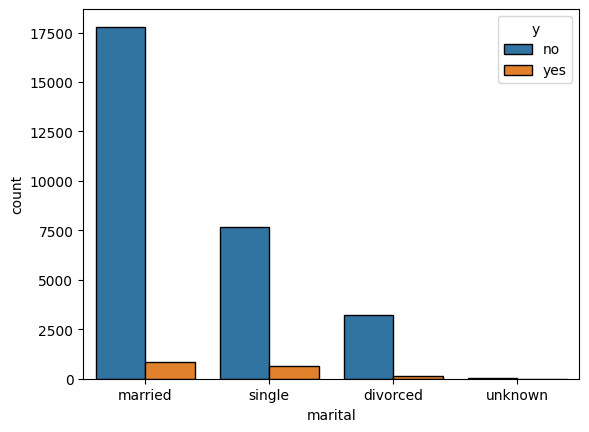

In [19]:
sns.countplot(data=bank_df2, x='marital',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['marital'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's marital =" ,round(bank_df2[(bank_df2['marital'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Education**

In [20]:
bank_df2.education.value_counts()

university.degree      8879
high.school            6940
basic.9y               4604
professional.course    3911
basic.4y               3047
basic.6y               1734
unknown                1232
illiterate               13
Name: education, dtype: int64

##############################################
Unkown job clients =  1232
##############################################
Percentage of unknown client's education level = 4.13 %


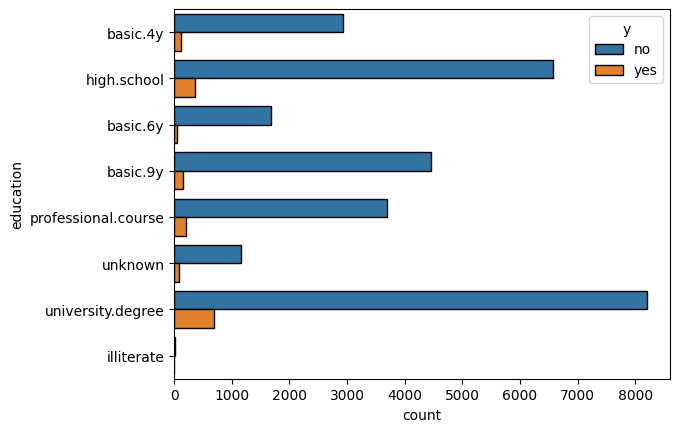

In [21]:
sns.countplot(data=bank_df2, y='education',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['education'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's education level =" ,round(bank_df2[(bank_df['education'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Default**

Default column says whether client is already has a credit, that sort of information might be more important in solution, so let's see the count

In [22]:
bank_df2.default.value_counts()

no         23494
unknown     6864
yes            2
Name: default, dtype: int64

##############################################
Unkown job clients =  6864
##############################################
Percentage of unknown client's default = 22.61 %


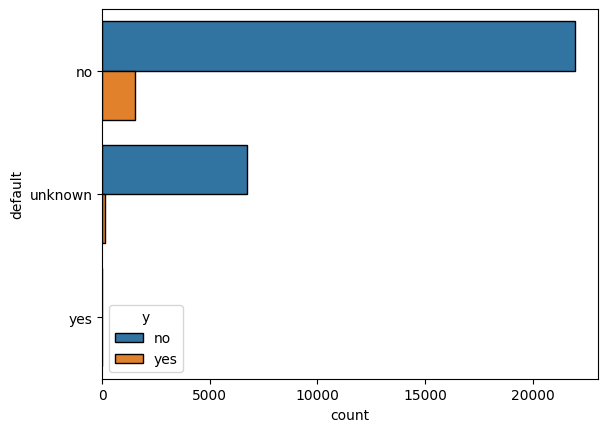

In [23]:
sns.countplot(data=bank_df2, y='default',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['default'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's default =" ,round(bank_df2[(bank_df2['default'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

There is a significant number of unknown status of client ability to the credit.

**Housing**

In [24]:
bank_df2.housing.value_counts()

yes        15799
no         13826
unknown      735
Name: housing, dtype: int64

##############################################
Unkown job clients =  735
##############################################
Percentage of unknown client's default = 2.41 %


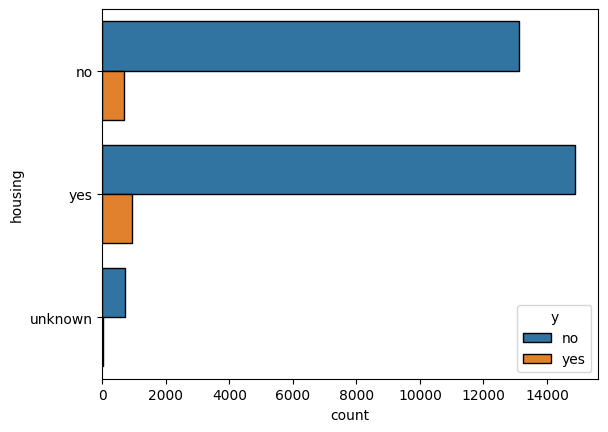

In [25]:
sns.countplot(data=bank_df2, y='housing',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['housing'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's default =" ,round(bank_df2[(bank_df['housing'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

**Loan**

In [26]:
bank_df2.loan.value_counts()

no         25026
yes         4599
unknown      735
Name: loan, dtype: int64

##############################################
Unkown job clients =  735
##############################################
Percentage of unknown client's default = 2.42 %


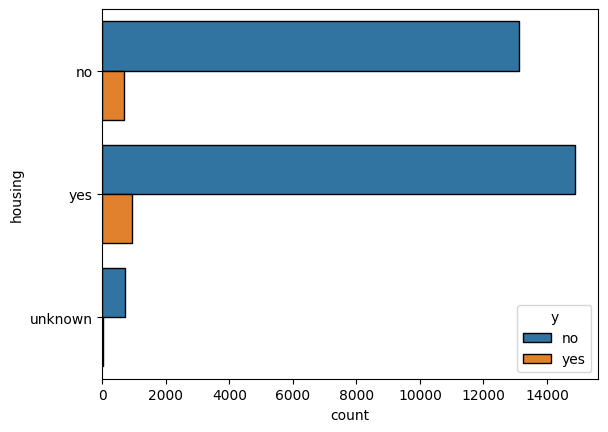

In [27]:
sns.countplot(data=bank_df2, y='housing',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df2[(bank_df2['housing'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's default =" ,round(bank_df2[(bank_df2['housing'] =='unknown')].shape[0]/bank_df2.shape[0]*100,2),'%')

The ages dont mean to much, has a medium dispersion and dont make sense relate with other variables will not tell any insight

Jobs, Marital and Education i think the best analisys is just the count of each variable, if we related with the other ones its is not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing.

Default, loan and housing, its just to see the distribution of people.

### **Categorical Features Imputation**

How many missing rows we have in each column?

In [28]:
bank_df2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

But actually there are named as unknown, so imputing them by Nan values get us to know the real count of missing information

In [29]:
bank_df2.replace('unknown', np.nan, regex=True,inplace=True)
bank_df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0, 0.5, 'NAs')

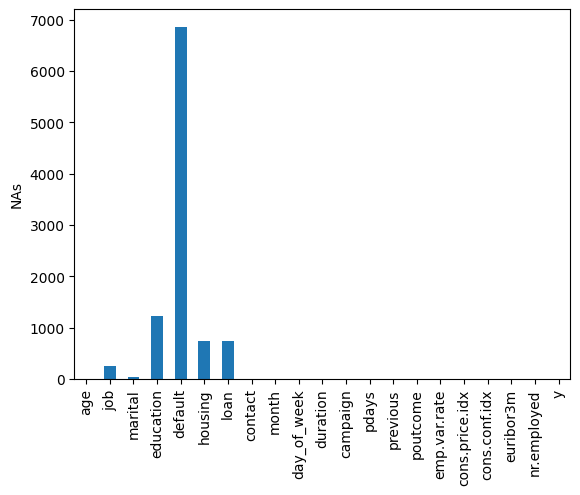

In [30]:
bank_df2.isna().sum().plot.bar()
plt.ylabel("NAs")

There are bars with the amount of unknown values for each column. Most of unclarity in default data whether a client has already credit.
It can be performed if to deep more on other bank resources as bank will have guarantee and to be more confident on client. 

In [31]:
eliminate = bank_df2.copy()
eliminate = eliminate.dropna()
print('Eliminated  ',bank_df2.shape[0]-eliminate.shape[0],' instances as Nan')
print('That is  ',round(((bank_df2.shape[0]-eliminate.shape[0])/bank_df2.shape[0])*100,2),' % in original data')
print( 'Current dataset size = ',eliminate.shape[0])

Eliminated   8300  instances as Nan
That is   27.34  % in original data
Current dataset size =  22060


As have shown above, default column has a huge missing information, let's drop it

In [32]:
bank_df3 = eliminate.copy()
bank_df3 = bank_df3.drop("default", axis=1)

In [33]:
bank_df3.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Numerical features analysis**

In [34]:
#Numerical features

numerical = bank_df3.select_dtypes(include=[np.number])
numerical_cols = numerical.columns.to_list()
numerical.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,22060.000000,22060.000000,22060.000000,22060.0,22060.0,22060.000000,22060.000000,22060.000000,22060.000000,22060.000000
mean,38.521940,205.165367,2.066636,999.0,0.0,0.251976,93.595045,-40.572743,3.828644,5176.922974
std,9.249297,140.269352,1.293994,0.0,0.0,1.479560,0.548236,4.286526,1.624231,64.162172
min,18.000000,0.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,100.000000,1.000000,999.0,0.0,-1.800000,93.200000,-42.700000,1.415000,5099.100000
50%,37.000000,168.000000,2.000000,999.0,0.0,1.100000,93.798000,-41.800000,4.857000,5195.800000
75%,45.000000,277.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,69.000000,644.000000,6.000000,999.0,0.0,1.400000,94.767000,-29.800000,5.045000,5228.100000


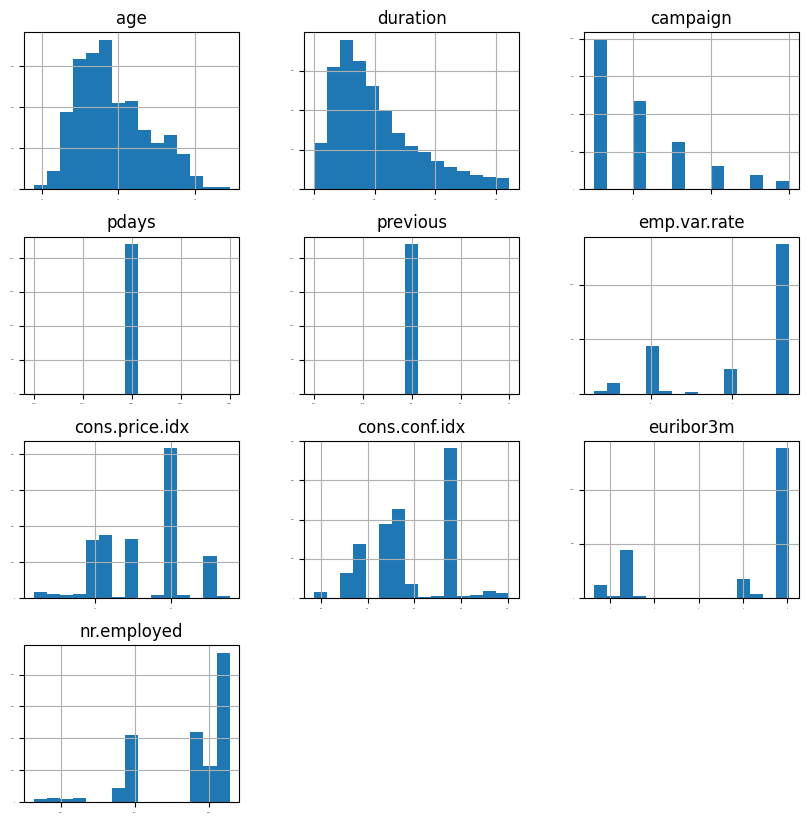

In [35]:
numerical.hist(bins = 15, figsize = (10,10), xlabelsize = 0.1, ylabelsize = 0.1)
plt.show()

**Age**

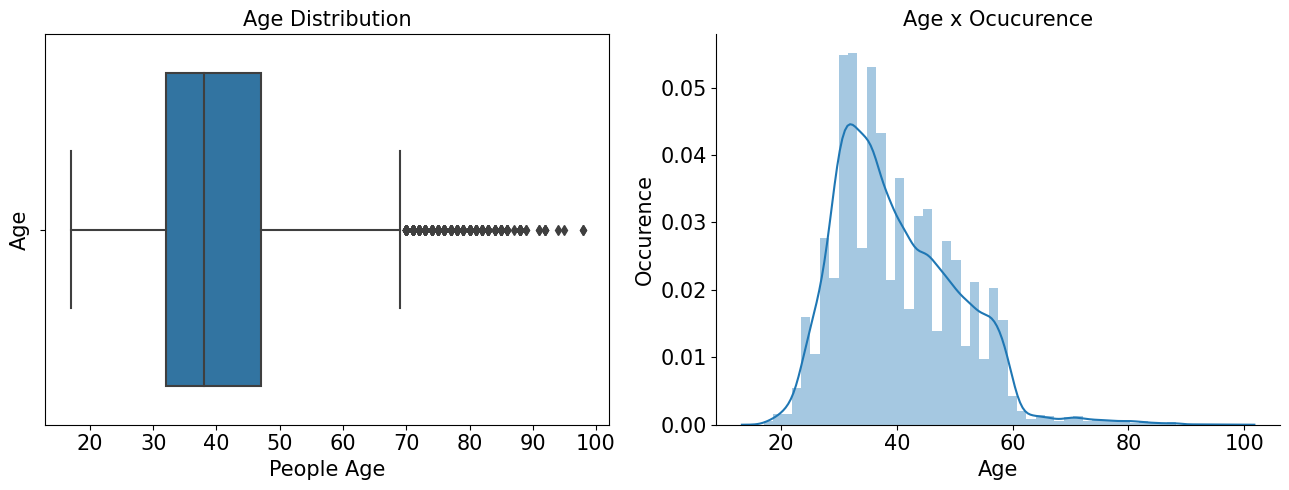

In [36]:

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [37]:
# Quartiles
print('1º Quartile: ', bank_df['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['age'].quantile(q = 1.00))
#Calculate the outliers:
# Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_df['age'].quantile(q = 0.75) + 
                        1.5*(bank_df['age'].quantile(q = 0.75) - bank_df['age'].quantile(q = 0.25)), 'are outliers') 

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [38]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_df['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_df['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_df['age'].std()*100/bank_df['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not. The outliers was calculated, so my thinking is fit the model with and without them

# Feature engineering - Removing features

As in histogram plot were shown above, there are constant values in columns pdays and previous. Let's drop them from data.

In [39]:
bank_df4 = bank_df3.drop(["pdays", "previous"], axis=1)

 Note the duration column description:
 
     -duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
So, seems that the feature need to be excluded.

In [40]:
bank_df4 = bank_df4.drop(["duration"], axis=1)

In [41]:
bank_df4.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [42]:
bank_df4.shape

(22060, 17)

Final dataframe

In [43]:
final_df = bank_df4.copy()

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22060 entries, 0 to 30359
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22060 non-null  int64  
 1   job             22060 non-null  object 
 2   marital         22060 non-null  object 
 3   education       22060 non-null  object 
 4   housing         22060 non-null  object 
 5   loan            22060 non-null  object 
 6   contact         22060 non-null  object 
 7   month           22060 non-null  object 
 8   day_of_week     22060 non-null  object 
 9   campaign        22060 non-null  int64  
 10  poutcome        22060 non-null  object 
 11  emp.var.rate    22060 non-null  float64
 12  cons.price.idx  22060 non-null  float64
 13  cons.conf.idx   22060 non-null  float64
 14  euribor3m       22060 non-null  float64
 15  nr.employed     22060 non-null  float64
 16  y               22060 non-null  object 
dtypes: float64(5), int64(2), object

# Feature encoding

In [45]:
categorical_cols = final_df.select_dtypes(include="object").columns.to_list()
categorical_cols.remove("y")
categorical_cols

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [46]:
numerical_cols = final_df.select_dtypes(include=[np.number]).columns.to_list()
numerical_cols

['age',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## **Modeling**

In [47]:
from pycaret.classification import *

I'm using pycaret framework, that is good for automatic building pipeline. Below is setup method with attributes for preprocessing final dataframe. 
Steps for next feature engineering are normalization of numeric features, fixing imbalance by SMOTE method in target and stratifying data to splits as because need to handle target distribution in 10-fold-cross validation, removing multi-colinearity 

In [48]:
clfs = setup(data = final_df, target = 'y',
             session_id=234, normalize=True, 
             numeric_features=numerical_cols, categorical_features=categorical_cols, 
             transformation = True, 
             remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
             fix_imbalance=True,
             data_split_stratify=True)

,Description,Value
0,session_id,234
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(22060, 17)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [49]:
models = compare_models(sort="AUC", n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9269,0.8534,0.2945,0.4159,0.3436,0.3063,0.3120,0.2560
catboost,CatBoost Classifier,0.9289,0.8513,0.2627,0.4284,0.3250,0.2897,0.2997,9.1190
gbc,Gradient Boosting Classifier,0.9161,0.8499,0.5452,0.3946,0.4568,0.4127,0.4196,1.4880
lr,Logistic Regression,0.8401,0.8491,0.7383,0.2518,0.3753,0.3082,0.3675,1.0640
lda,Linear Discriminant Analysis,0.8486,0.8490,0.7323,0.2626,0.3863,0.3213,0.3769,0.1420
rf,Random Forest Classifier,0.9257,0.8442,0.2975,0.4046,0.3426,0.3042,0.3084,0.7350
xgboost,Extreme Gradient Boosting,0.9279,0.8397,0.2477,0.4137,0.3087,0.2732,0.2838,1.8400
ada,Ada Boost Classifier,0.8875,0.8390,0.6040,0.3131,0.4116,0.3564,0.3805,0.4360
et,Extra Trees Classifier,0.9217,0.8124,0.2836,0.3699,0.3202,0.2795,0.2827,0.8100
nb,Naive Bayes,0.8672,0.7947,0.5423,0.2552,0.3466,0.2833,0.3086,0.0430


It seems that better performance is reached by LightGBM model

In [50]:
lgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9333,0.8706,0.2871,0.4833,0.3602,0.3275,0.3399
1,0.9320,0.8457,0.3100,0.4627,0.3713,0.3368,0.3444
2,0.9301,0.8814,0.3400,0.4474,0.3864,0.3500,0.3537
3,0.9275,0.8566,0.2700,0.4091,0.3253,0.2887,0.2956
4,0.9275,0.8498,0.2200,0.3929,0.2821,0.2470,0.2586
5,0.9229,0.8494,0.3100,0.3827,0.3425,0.3021,0.3040
6,0.9288,0.8737,0.3168,0.4384,0.3678,0.3311,0.3360
7,0.9216,0.8465,0.2673,0.3649,0.3086,0.2681,0.2717
8,0.9229,0.8043,0.3168,0.3902,0.3497,0.3092,0.3111


In [51]:
#trained model object is stored in the variable 'lgbm'. 
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=234, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [52]:
tuned_lgbm = tune_model(lgbm, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9133,0.8859,0.7327,0.4088,0.5248,0.4813,0.5062
1,0.9236,0.8607,0.7000,0.4430,0.5426,0.5032,0.5189
2,0.8983,0.8756,0.7300,0.3596,0.4818,0.4326,0.4661
3,0.9009,0.8479,0.6800,0.3598,0.4706,0.4216,0.4477
4,0.9119,0.8615,0.6000,0.3846,0.4688,0.4232,0.4357
5,0.9016,0.8719,0.6500,0.3571,0.4610,0.4118,0.4343
6,0.9093,0.8727,0.7327,0.3957,0.5139,0.4688,0.4959
7,0.9080,0.8339,0.6139,0.3758,0.4662,0.4190,0.4342
8,0.8990,0.8143,0.5941,0.3429,0.4348,0.3837,0.4012


In [53]:
#tuned model object is stored in the variable 'tuned_lgbm'. 
print(tuned_lgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=1e-06, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=50, n_jobs=-1, num_leaves=90, objective=None,
               random_state=234, reg_alpha=0.5, reg_lambda=0.4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


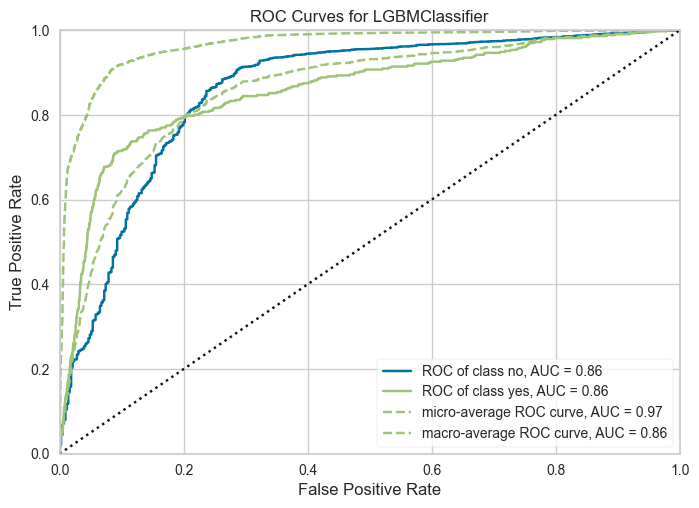

In [54]:
plot_model(tuned_lgbm, plot = 'auc')

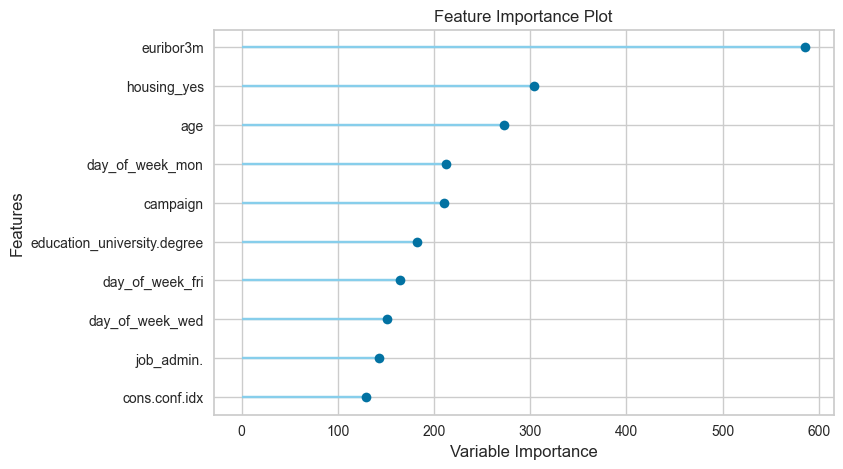

In [55]:
plot_model(tuned_lgbm, plot='feature')

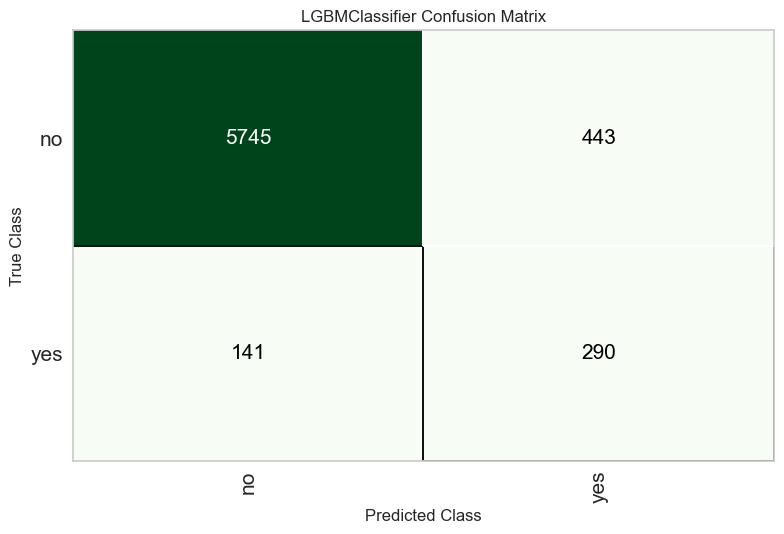

In [56]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

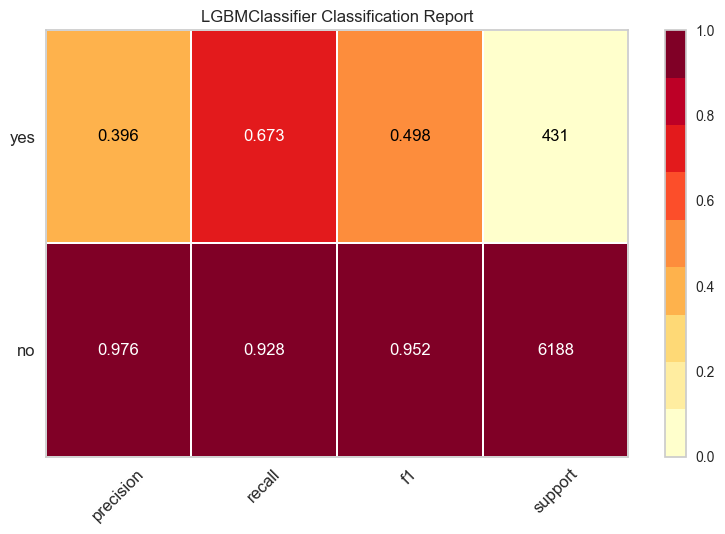

In [57]:
plot_model(tuned_lgbm, plot = 'class_report')

### **Blending**

In [58]:
catboost = create_model("catboost")
xgb = create_model("xgboost")
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9230,0.8527,0.2871,0.3816,0.3277,0.2877,0.2910
1,0.9320,0.8518,0.3200,0.4638,0.3787,0.3440,0.3506
2,0.9352,0.8856,0.3700,0.5000,0.4253,0.3918,0.3968
3,0.9288,0.8442,0.2700,0.4219,0.3293,0.2936,0.3017
4,0.9203,0.8216,0.2500,0.3425,0.2890,0.2479,0.2514
5,0.9216,0.8348,0.2900,0.3671,0.3240,0.2830,0.2853
6,0.9288,0.8645,0.3267,0.4400,0.3750,0.3381,0.3423
7,0.9242,0.8373,0.3069,0.3974,0.3464,0.3069,0.3097
8,0.9210,0.8044,0.2673,0.3600,0.3068,0.2659,0.2692


In [59]:
# blend individual models
blend_soft = blend_models(estimator_list = [tuned_lgbm, xgb, rf, catboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9301,0.8635,0.2475,0.4386,0.3165,0.2826,0.2955
1,0.9378,0.8516,0.3000,0.5357,0.3846,0.3546,0.3712
2,0.9333,0.8844,0.2900,0.4754,0.3602,0.3272,0.3384
3,0.9301,0.8525,0.2300,0.4259,0.2987,0.2653,0.2794
4,0.9288,0.8457,0.2600,0.4194,0.3210,0.2856,0.2947
5,0.9294,0.8507,0.2700,0.4286,0.3313,0.2960,0.3049
6,0.9249,0.8723,0.2277,0.3770,0.2840,0.2468,0.2556
7,0.9307,0.8462,0.2772,0.4516,0.3436,0.3092,0.3195
8,0.9223,0.8144,0.2772,0.3733,0.3182,0.2779,0.2814


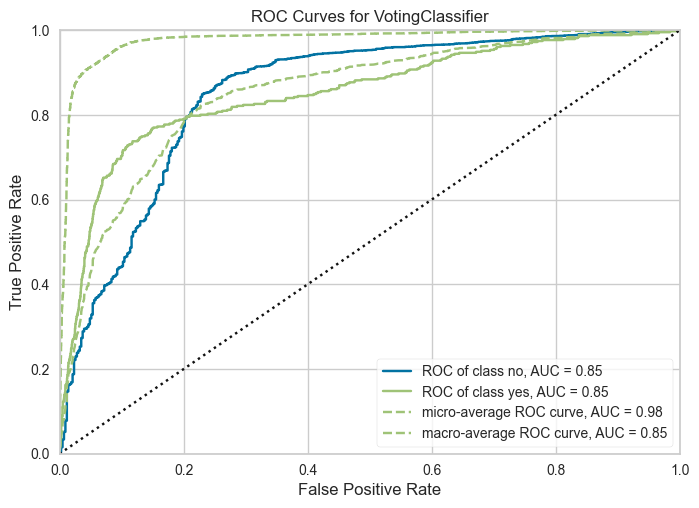

In [60]:
plot_model(blend_soft, plot = 'auc')

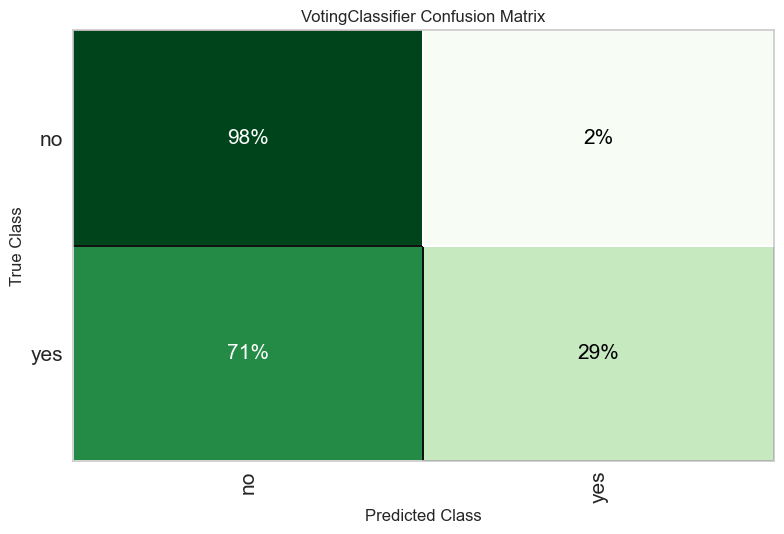

In [61]:
plot_model(blend_soft, plot = 'confusion_matrix', plot_kwargs={'percent': True})

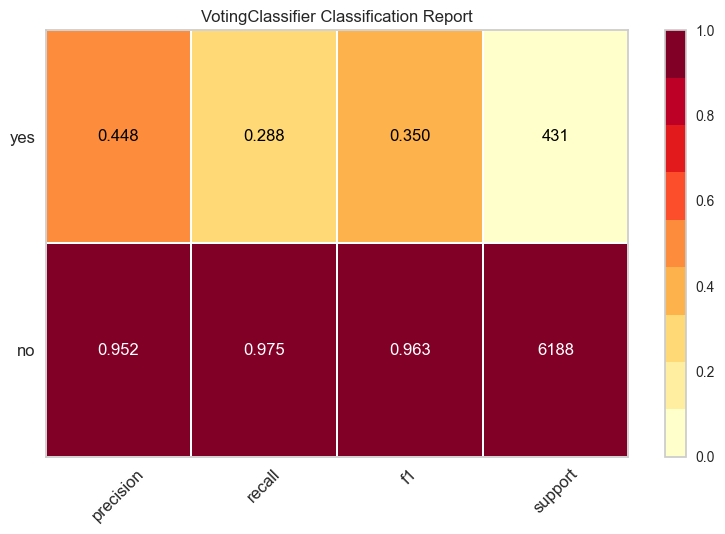

In [62]:
plot_model(blend_soft, plot = 'class_report')

In [63]:
# blend individual models
blend_hard = blend_models(estimator_list = [tuned_lgbm, xgb, rf, catboost], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9346,0.0000,0.2673,0.5000,0.3484,0.3173,0.3346
1,0.9359,0.0000,0.2800,0.5091,0.3613,0.3305,0.3470
2,0.9352,0.0000,0.3100,0.5000,0.3827,0.3505,0.3617
3,0.9294,0.0000,0.2300,0.4182,0.2968,0.2629,0.2760
4,0.9236,0.0000,0.2200,0.3548,0.2716,0.2336,0.2411
5,0.9262,0.0000,0.2500,0.3906,0.3049,0.2679,0.2753
6,0.9268,0.0000,0.2376,0.4000,0.2981,0.2622,0.2721
7,0.9288,0.0000,0.2871,0.4328,0.3452,0.3092,0.3165
8,0.9236,0.0000,0.2970,0.3896,0.3371,0.2973,0.3004


### **Stacking**

In [64]:
stack_soft = stack_models(estimator_list = [xgb, rf, catboost], meta_model = lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9301,0.8443,0.0396,0.2667,0.0690,0.0530,0.0806
1,0.9333,0.8362,0.0100,0.2000,0.0190,0.0130,0.0313
2,0.9346,0.8582,0.0600,0.4615,0.1062,0.0927,0.1486
3,0.9333,0.8155,0.0200,0.2857,0.0374,0.0292,0.0606
4,0.9352,0.7920,0.0500,0.5000,0.0909,0.0801,0.1428
5,0.9313,0.8189,0.0300,0.2500,0.0536,0.0403,0.0666
6,0.9326,0.8510,0.0396,0.3636,0.0714,0.0593,0.1022
7,0.9320,0.8328,0.0792,0.4000,0.1322,0.1131,0.1550
8,0.9313,0.7772,0.0396,0.3077,0.0702,0.0561,0.0903


In [65]:
best_auc_model = automl(optimize = 'AUC')

In [66]:
best_auc_model

LGBMClassifier(bagging_fraction=0.7, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=1e-06, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=50, n_jobs=-1, num_leaves=90, objective=None,
               random_state=234, reg_alpha=0.5, reg_lambda=0.4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [67]:
pred_holdouts = predict_model(best_auc_model)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9118,0.8595,0.6729,0.3956,0.4983,0.4535,0.4727


,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,y,Label,Score
0,-1.112059,-1.011541,-1.239962,-1.323543,-1.497504,-1.317692,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,no,no,0.5
1,-0.668086,-1.011541,-0.323837,1.035679,0.830102,1.018300,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,no,no,0.5
2,-1.427064,0.332885,0.560595,-0.473942,0.816150,1.018300,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no,no,0.5
3,-0.812119,-1.011541,1.686856,-0.260216,0.625627,1.018300,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,no,no,0.5
4,0.880473,-1.011541,-0.323837,1.035679,0.822122,1.018300,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no,no,0.5


In [68]:
final = finalize_model(best_auc_model)

In [69]:
final

LGBMClassifier(bagging_fraction=0.7, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=1e-06, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=50, n_jobs=-1, num_leaves=90, objective=None,
               random_state=234, reg_alpha=0.5, reg_lambda=0.4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [70]:
#save model
save_model(final,'Final Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['job', 'marital',
                                                             'education',
                                                             'housing', 'loan',
                                                             'contact', 'month',
                                                             'day_of_week',
                                                             'poutcome'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['age', 'campaign',
                                                           'emp.var.rate',
                                                           'cons.price.idx',
                                                      

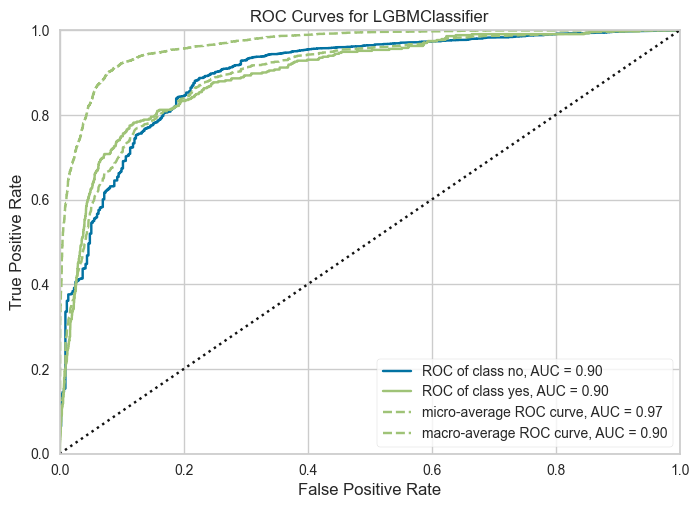

In [74]:
plot_model(final, plot = 'auc')

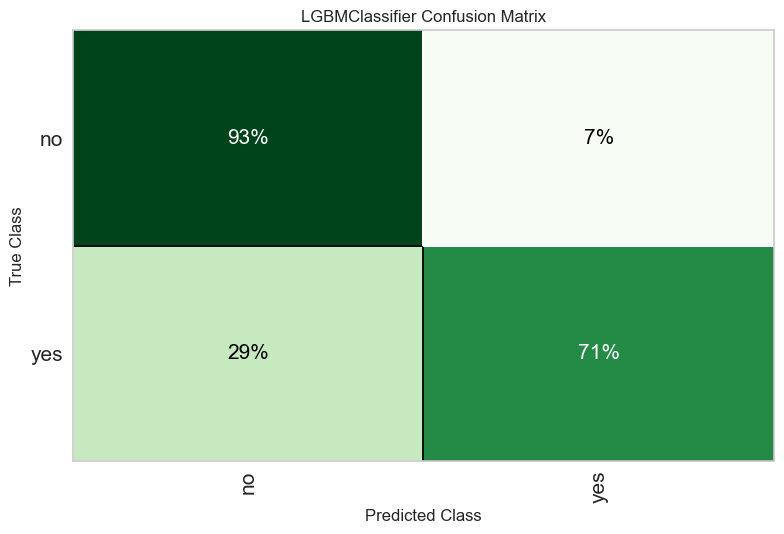

In [71]:
plot_model(final, 'confusion_matrix', plot_kwargs={'percent': True})

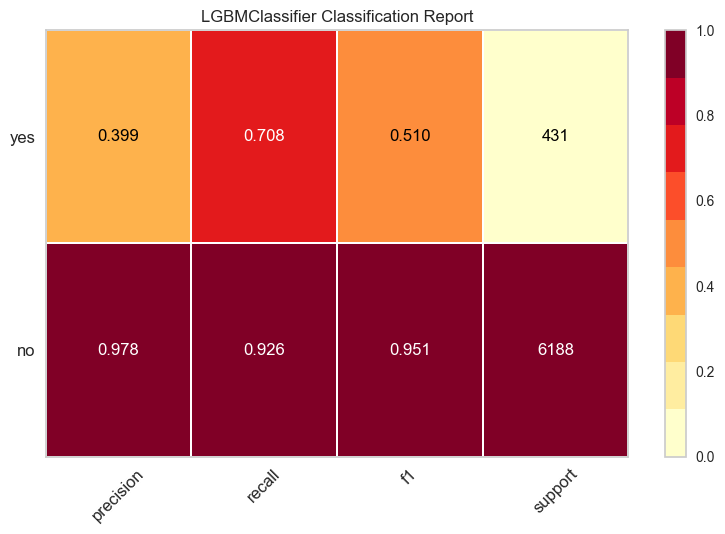

In [73]:
plot_model(final, plot = 'class_report')

Predict on test data

In [72]:
pred_holdouts = predict_model(final)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9116,0.8982,0.7077,0.3992,0.5105,0.4660,0.4891


,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,y,Label,Score
0,-1.112059,-1.011541,-1.239962,-1.323543,-1.497504,-1.317692,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,no,no,0.5
1,-0.668086,-1.011541,-0.323837,1.035679,0.830102,1.018300,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,no,no,0.5
2,-1.427064,0.332885,0.560595,-0.473942,0.816150,1.018300,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no,no,0.5
3,-0.812119,-1.011541,1.686856,-0.260216,0.625627,1.018300,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,no,no,0.5
4,0.880473,-1.011541,-0.323837,1.035679,0.822122,1.018300,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no,no,0.5


# Conclusion


 - Light Gradient Boosting Machine is the best model in terms of ROC-AUC (93% after tuning) and F1 Score (50%).
The state of the data is very unbalanced so accuracy is not a parameter that is evaluated
 - If the prediction goal is to maximize the model's ability to distinguish between class 0 and class 1, then LGBM is the best method since the ROC-AUC is 93%.
 - If the goal of forecasting is to maximize the number of leads but also to minimize campaign costs, then there is no good model because the accuracy score for class 1 is still low. Currently, the best score of accuracy class 1 is also in LGBM with a score of 71%.
 - If the focus of the forecast is on maximizing the number of potential buyers by allowing campaigns for non-potential buyers, then there is no good model because the class 1 recall rate is still low. Currently, the best class 1 recall score is also in LGBM with a score of 71%. Another way is to change the threshold probability classification for the same model to increase the recall rate.
